In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys, os

In [3]:
curenet_dir = os.getcwd()
parent_dir = os.path.dirname(curenet_dir)
sys.path.insert(0, parent_dir)

In [4]:
from scripts.load_data import load_data

In [5]:
df = load_data('../datasets/Fraud_Data.csv')

In [6]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
df.shape

(151112, 11)

In [9]:
df.drop_duplicates(inplace=True)
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

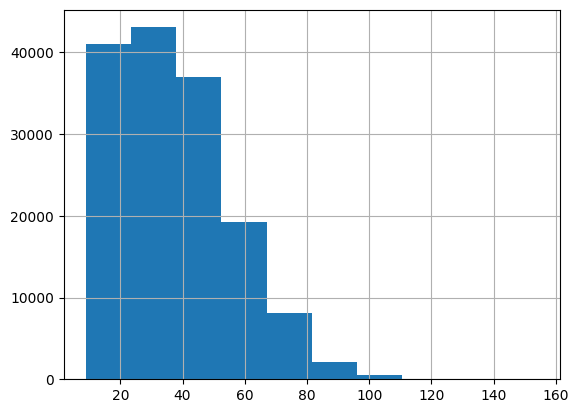

In [10]:
import matplotlib.pyplot as plt
df['purchase_value'].hist()
plt.show()

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
import ipaddress
def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))


In [13]:
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()



In [14]:
df['transactions_per_device'] = df.groupby('device_id')['user_id'].transform('count')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['purchase_value', 'time_since_signup']] = scaler.fit_transform(df[['purchase_value', 'time_since_signup']])


In [16]:
df = pd.get_dummies(df, columns=['browser', 'source'], drop_first=True)


In [18]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,time_since_signup,transactions_per_device,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,M,39,7.327584e+08,0,-0.136057,1,False,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,F,53,3.503114e+08,0,-1.571877,1,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,M,53,2.621474e+09,1,-1.577617,12,False,False,True,False,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,M,41,3.840542e+09,0,-1.420213,1,False,False,False,True,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,M,45,4.155831e+08,0,-0.182509,1,False,False,False,True,False,False
